[ 2.+1.j -2.+2.j  1.+2.j ...  1.+2.j -2.+2.j -1.+2.j]
[[ 2. -2.  1. ...  1. -2. -1.]
 [ 1.  2.  2. ...  2.  2.  2.]]
True


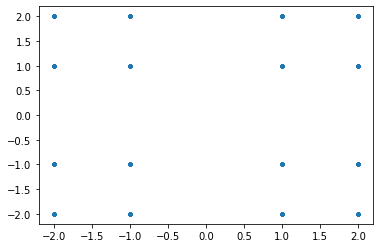

In [7]:
# FOR TESTING STRAIGHT UP MOD/DEMOD
#############
# FOR INCORPORATING PULSE SHAPING

import preamble_test
import symbol_mod
import symbol_demod
import numpy as np
import preamble_generator
import data_source
import mode_preconfiguration
import pulse_shaping
import matched_filtering
import time
import matplotlib.pyplot as plt

fs = 750000.0	       # maximum output sampling rate sustainable for pluto streaming: 2750000 (Hz), for m2k streaming: 750000 (Hz) 
Ts = 1.0 / fs          # sampling period in seconds
f0 = 0.0               # homodyne (0 HZ IF)
M = 6                  # oversampling factor
T = M*Ts               # symbol period in seconds
Rs = 1/T               # symbol rate
segment_size = 1504    # One Transport Stream (TS) packet=188Bytes=1504 bits
R = 5                 # Packet Ratio: number of segments contained in our larger OOK packet 
N = R*segment_size     # OOK Packet Length (equals R* segment_size)

b = "40k"             #bandwidth of Iperf client (UDP test)

test_packet_num = 20  #number of ADALM packets transmitted in Iperf test
        
Mode = 4

serverSock, generated_sequence, sequence_counter, l = mode_preconfiguration.tx_mode_preconfig(Mode, R, segment_size, N, b, test_packet_num)
preamble_ones_length = 380
preamble = preamble_generator.preamble_generator(preamble_ones_length)
#preamble = np.zeros(200)

known_preamble_bits = data_source.data_source(Mode, serverSock, generated_sequence, sequence_counter, l)

#############

import preamble_test
import symbol_mod
import symbol_demod
import numpy as np
import preamble_generator
import matplotlib.pyplot as plt

scheme = "QAM"

#preamble_length = 200

#Generate the known copy of the preamble for packet detection
#known_preamble_bits = preamble_test.preamble_generator()

#known_preamble_bits = np.array([1,1,0,0,
                       #1,1,0,0,
                       #0,1,1,0,
                       #0,1,1,0,
                       #0,0,1,1,
                      # 0,0,1,1,
                      # 0,1,1,0,
                      # 0,1,1,0,
                       #0,1,1,0,
                       #1,1,0,0])
#
#known_preamble_bits = np.rand

#known_preamble_bits = preamble_generator.preamble_generator()
#print(known_preamble_bits)
preamble_length = 0

known_preamble_symbols = symbol_mod.symbol_mod(known_preamble_bits, scheme, 0)
#known_preamble = np.abs(pulse_shaping.pulse_shaping(known_preamble_symbols, samples_perbit, fs_in, 'rect', None, None))
#known_preamble_ac = known_preamble - np.mean(known_preamble)

print(known_preamble_symbols)
I_symbols = np.real(known_preamble_symbols)
Q_symbols = np.imag(known_preamble_symbols)

buff = np.array([I_symbols,Q_symbols])
print(buff)

#Reverse the preamble sample sequence to obtain coefficients for the matched filter
#matched_filter_coef = np.flip(known_preamble_symbols)

#Generate demod bits
demod_bits = symbol_demod.symbol_demod(buff, scheme, 1, preamble_length) # gain has to be set to 1

#print(demod_bits)
print(np.array_equal(known_preamble_bits, demod_bits, equal_nan=False))

showplot = True
if(showplot==True):
        #plt.ylim((-2, 1))
        #plt.xlim((1, 2))
        #for i in range(len(symbols_I)):
                #plt.plot(symbols_I[i]/channel_gain,symbols_Q[i]/channel_gain, color='blue', marker='o', markersize=1)
                
        plt.plot(I_symbols,Q_symbols, '.')
        plt.show()
